In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df_original = pd.read_csv("../data/raw/train.csv")
df = df_original.copy()
df.head()

Patient Id  Patient Age Genes in mother's side Inherited from father   
0  PID0x6418          2.0                    Yes                    No  \
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name   
0           Yes            No                4.760603            Richard  \
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects   
0         NaN         Larre  ...            NaN  \
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result   
0                                          9.857562               NaN  \
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5   
0       1.0       1.0       1.0       1.0        1.0  \
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder   
0   Mitochondrial genetic inheritance disorders  \
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

In [4]:
df1 = df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Parental consent", "Institute Name", "Location of Institute"], axis=1)
df1.head()

Patient Age Genes in mother's side Inherited from father Maternal gene   
0          2.0                    Yes                    No           Yes  \
1          4.0                    Yes                   Yes            No   
2          6.0                    Yes                    No            No   
3         12.0                    Yes                    No           Yes   
4         11.0                    Yes                    No           NaN   

  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age    Status   
0            No                4.760603           NaN           NaN     Alive  \
1            No                4.910669           NaN          23.0  Deceased   
2            No                4.893297          41.0          22.0     Alive   
3            No                4.705280          21.0           NaN  Deceased   
4           Yes                4.720703          32.0           NaN     Alive   

  Respiratory Rate (breaths/min)  ... Birth defects   
0                 Normal (30-60)  ...           NaN  \
1                      Tachypnea  ...      Multiple   
2                 Normal (30-60)  ...      Singular   
3                      Tachypnea  ...      Singular   
4                      Tachypnea  ...      Multiple   

   White Blood cell count (thousand per microliter)  Blood test result   
0                                          9.857562                NaN  \
1                                          5.522560             normal   
2                                               NaN             normal   
3                                          7.919321       inconclusive   
4                                          4.098210                NaN   

   Symptom 1  Symptom 2  Symptom 3 Symptom 4 Symptom 5   
0        1.0        1.0        1.0       1.0       1.0  \
1        1.0        NaN        1.0       1.0       0.0   
2        0.0        1.0        1.0       1.0       1.0   
3        0.0        0.0        1.0       0.0       0.0   
4        0.0        0.0        0.0       0.0       NaN   

                               Genetic Disorder   
0   Mitochondrial genetic inheritance disorders  \
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 38 columns]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [6]:
df1.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age   
count  20656.000000            22083.000000  16047.000000  16097.000000  \
mean       6.974148                4.898871     34.526454     41.972852   
std        4.319475                0.199663      9.852598     13.035501   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763109     26.000000     31.000000   
50%        7.000000                4.899399     35.000000     42.000000   
75%       11.000000                5.033830     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion   
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000  \
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min        0.0      0.0      0.0      1.0      0.0                  0.000000   
25%        0.0      0.0      0.0      1.0      0.0                  1.000000   
50%        0.0      0.0      0.0      1.0      0.0                  2.000000   
75%        0.0      0.0      0.0      1.0      0.0                  3.000000   
max        0.0      0.0      0.0      1.0      0.0                  4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1   
count                                      19935.000000  19928.000000  \
mean                                           7.486224      0.592483   
std                                            2.653393      0.491385   
min                                            3.000000      0.000000   
25%                                            5.424703      0.000000   
50%                                            7.477132      1.000000   
75%                                            9.526152      1.000000   
max                                           12.000000      1.000000   

          Symptom 2     Symptom 3     Symptom 4     Symptom 5  
count  19861.000000  19982.000000  19970.000000  19930.000000  
mean       0.551886      0.536233      0.497747      0.461917  
std        0.497313      0.498698      0.500007      0.498560  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        1.000000      1.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [7]:
df1["Test 1"].unique()

array([ 0., nan])

In [8]:
df1["Symptom 1"].unique()

array([ 1.,  0., nan])

In [9]:
df1 = df1.drop(["Test 1", "Test 2", "Test 3", "Test 4", "Test 5", "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"], axis=1)

Change column names

In [10]:
df1.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [11]:
df1.rename(columns={"Patient Age": "Patient_Age", "Genes in mother's side": "Mother_inherit", "Inherited from father": "Father_inherit",
                    "Maternal gene": "Maternal_gene", "Paternal gene": "Paternal_gene", "Blood cell count (mcL)": "Blood_cell_count",
                    "Mother's age": "Mother_age", "Father's age": "Father_age", "Respiratory Rate (breaths/min)": "Respiratory_rate",
                    "Heart Rate (rates/min": "Heart_rate", "Follow-up": "Follow_up", "Birth asphyxia": "Birth_asphyxia",
                    "Autopsy shows birth defect (if applicable)": "Autopsy_birth_defect", "Place of birth": "Place_birth",
                    "Folic acid details (peri-conceptional)": "Folic_acid", "H/O serious maternal illness": "Maternal_illness",
                    "H/O radiation exposure (x-ray)": "Radiation_exposure", "H/O substance abuse": "Substance_abuse",
                    "Assisted conception IVF/ART": "Assisted_conception", "History of anomalies in previous pregnancies": "History_previous_pregnancies",
                    "No. of previous abortion": "Number_abortions", "Birth defects": "Birth_defects", "White Blood cell count (thousand per microliter)": "WBC_count",
                    "Blood test result": "Blood_test", "Genetic Disorder": "Genetic_disorder", "Disorder Subclass": "Disorder_subclass"}, inplace=True)

Replacing missing information

In [12]:
df1["Birth_asphyxia"].value_counts()

Birth_asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64

In [13]:
df1["Autopsy_birth_defect"].value_counts()

Autopsy_birth_defect
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64

In [14]:
df1["Radiation_exposure"].value_counts()

Radiation_exposure
Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: count, dtype: int64

In [15]:
df1["Substance_abuse"].value_counts()

Substance_abuse
-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: count, dtype: int64

In [16]:
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("No record",np.NaN)
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("Not available",np.NaN)

df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("None",np.NaN)
df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("Not applicable",np.NaN)

df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("-",np.NaN)
df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("Not applicable",np.NaN)

df1["Substance_abuse"] = df1["Substance_abuse"].replace("-",np.NaN)
df1["Substance_abuse"] = df1["Substance_abuse"].replace("Not applicable",np.NaN)

Working with missing values or repeated information

In [17]:
df1.shape

(22083, 28)

In [18]:
df1.isna().sum().sort_values(ascending=False)
# Missing values are present mainly in the following columns: Autopsy_birth_defect, Birth_asphyxia, Radiation_exposure and Substance_abuse.
# The missing data in each of these columns represent more than half of the rows.

Autopsy_birth_defect            15475
Birth_asphyxia                  12133
Radiation_exposure              12098
Substance_abuse                 12075
Mother_age                       6036
Father_age                       5986
Maternal_gene                    2810
Gender                           2173
History_previous_pregnancies     2172
Disorder_subclass                2168
Follow_up                        2166
Number_abortions                 2162
Birth_defects                    2154
Maternal_illness                 2152
Respiratory_rate                 2149
WBC_count                        2148
Genetic_disorder                 2146
Blood_test                       2145
Place_birth                      2124
Assisted_conception              2122
Folic_acid                       2117
Heart_rate                       2113
Patient_Age                      1427
Father_inherit                    306
Blood_cell_count                    0
Mother_inherit                      0
Status      

In [19]:
df1.duplicated().sum()
# There are no duplicated rows

0

In [20]:
df1[df1["Genetic_disorder"].isna() & df1["Disorder_subclass"].isna()]

Patient_Age Mother_inherit Father_inherit Maternal_gene Paternal_gene   
80             2.0             No             No           Yes           Yes  \
89            12.0             No             No            No           Yes   
240            2.0             No             No           NaN            No   
262            1.0            Yes             No           Yes           Yes   
485           14.0            Yes             No           Yes            No   
...            ...            ...            ...           ...           ...   
21496          1.0            Yes             No           Yes           Yes   
21565          NaN            Yes            Yes           NaN           Yes   
21645          NaN            Yes            Yes           Yes            No   
21701          3.0            Yes            NaN           Yes            No   
21777          2.0            Yes            Yes           NaN           Yes   

       Blood_cell_count  Mother_age  Father_age    Status Respiratory_rate   
80             4.940671        31.0        43.0  Deceased   Normal (30-60)  \
89             5.145456         NaN         NaN     Alive              NaN   
240            4.590071         NaN        55.0  Deceased              NaN   
262            4.835174        29.0        24.0     Alive   Normal (30-60)   
485            4.793518        47.0        40.0  Deceased        Tachypnea   
...                 ...         ...         ...       ...              ...   
21496          4.921901        23.0        47.0  Deceased        Tachypnea   
21565          4.733504        32.0         NaN     Alive   Normal (30-60)   
21645          5.131746        27.0         NaN  Deceased   Normal (30-60)   
21701          5.123119        42.0         NaN  Deceased   Normal (30-60)   
21777          4.896781        40.0        23.0  Deceased        Tachypnea   

       ... Radiation_exposure Substance_abuse Assisted_conception   
80     ...                NaN             NaN                  No  \
89     ...                NaN             NaN                 Yes   
240    ...                NaN             NaN                 Yes   
262    ...                NaN             Yes                  No   
485    ...                 No             NaN                 NaN   
...    ...                ...             ...                 ...   
21496  ...                NaN              No                  No   
21565  ...                NaN             NaN                 NaN   
21645  ...                NaN             NaN                 Yes   
21701  ...                 No             NaN                  No   
21777  ...                NaN             NaN                 Yes   

      History_previous_pregnancies Number_abortions Birth_defects  WBC_count   
80                              No              0.0           NaN   9.481868  \
89                             NaN              2.0      Singular   4.874626   
240                            Yes              3.0      Multiple   8.298976   
262                            Yes              2.0      Multiple   9.783686   
485                            Yes              2.0      Multiple   5.647696   
...                            ...              ...           ...        ...   
21496                           No              4.0      Singular   5.427841   
21565                          Yes              1.0      Multiple   6.483751   
21645                           No              4.0      Singular   7.477132   
21701                           No              3.0      Multiple  11.671116   
21777                          Yes              1.0      Multiple  10.336544   

              Blood_test Genetic_disorder Disorder_subclass  
80          inconclusive              NaN               NaN  
89              abnormal              NaN               NaN  
240               normal              NaN               NaN  
262    slightly abnormal              NaN               NaN  
485      

In [21]:
# The aim is to predict the Genetic Disorder and Disorder Subclass a patient has.
# If the patient has no value in the Genetic Disorder and Disorder Subclass columns for the training data, we can assume that the genetic disease is unknown or not present.
# Either way, we can drop the rows with missing values.

df1.dropna(subset=["Genetic_disorder", "Disorder_subclass"], axis=0, inplace=True)
df1.isna().sum().sort_values(ascending=False)

Autopsy_birth_defect            12623
Birth_asphyxia                   9784
Radiation_exposure               9774
Substance_abuse                  9752
Mother_age                       4457
Father_age                       4418
Maternal_gene                    2071
History_previous_pregnancies     1614
WBC_count                        1607
Place_birth                      1591
Assisted_conception              1590
Follow_up                        1575
Gender                           1573
Respiratory_rate                 1570
Birth_defects                    1565
Folic_acid                       1564
Blood_test                       1564
Maternal_illness                 1552
Number_abortions                 1546
Heart_rate                       1528
Patient_Age                      1060
Father_inherit                    220
Mother_inherit                      0
Status                              0
Blood_cell_count                    0
Paternal_gene                       0
Genetic_diso

Data variation and correlation

In [22]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
categoric_cols = df1.select_dtypes(exclude=[np.number]).columns

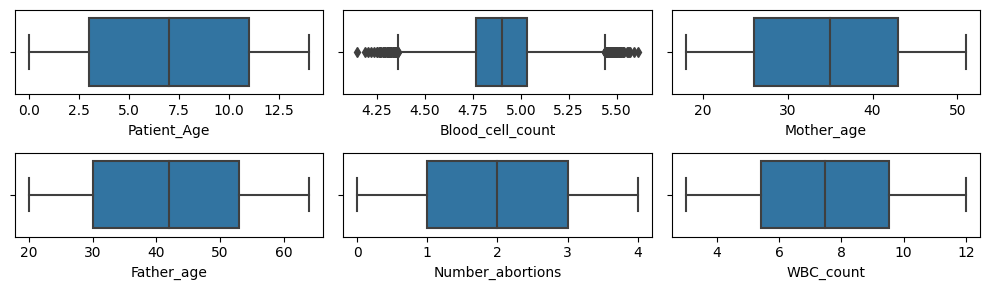

In [23]:
cols = 3
rows = 2
num_cols = df1[numeric_cols].columns
fig = plt.figure(figsize= (10,3))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(x=df1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

C:\Users\crist\AppData\Local\Temp\ipykernel_8888\1028612016.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1[col], ax=ax)
C:\Users\crist\AppData\Local\Temp\ipykernel_8888\1028612016.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1[col], ax=ax)
C:\Users\crist\AppData\Local\Temp\

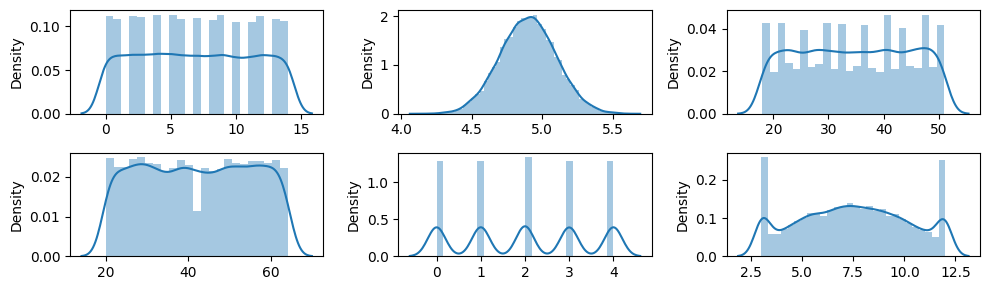

In [24]:
cols = 3
rows = 2
num_cols = df1[numeric_cols].columns
fig = plt.figure(figsize= (10,3))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.distplot(x=df1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

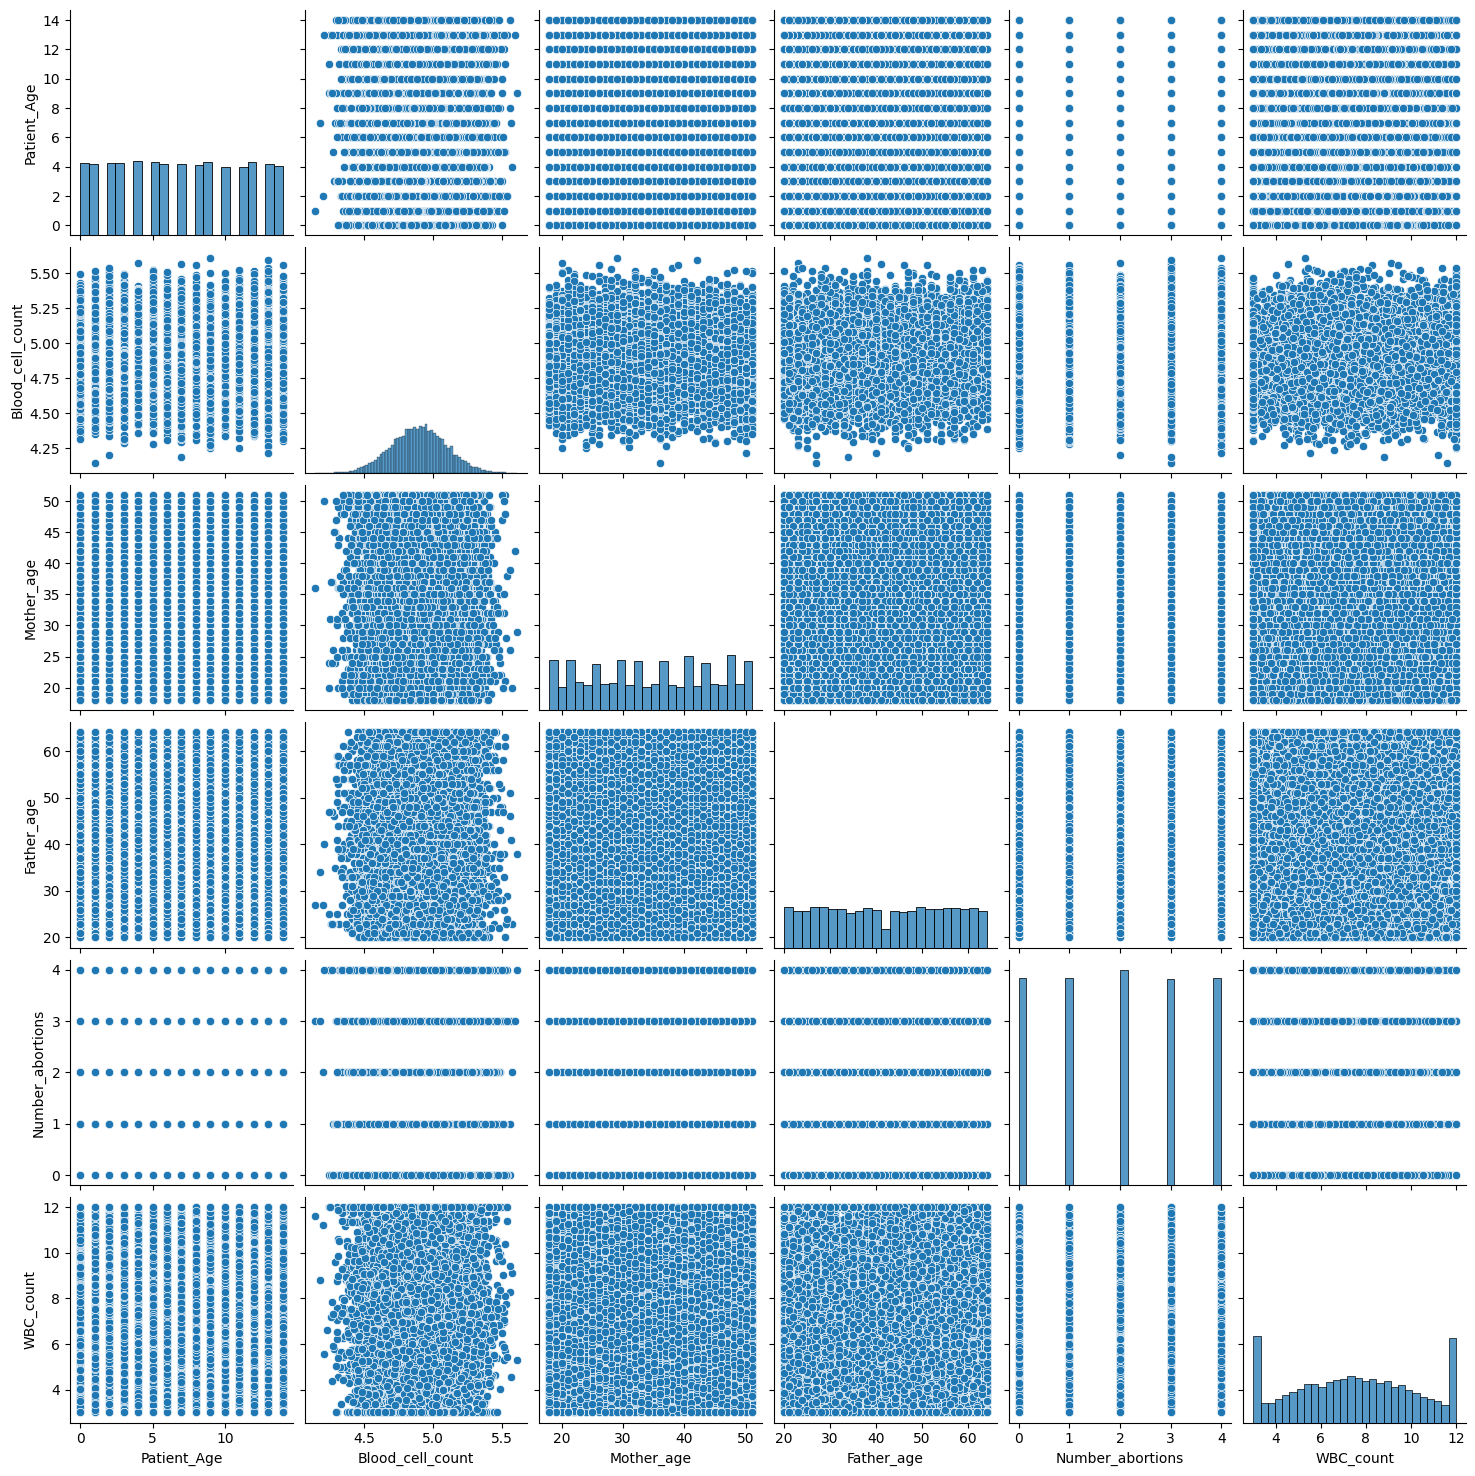

In [25]:
sns.pairplot(df1[numeric_cols]);

<Axes: >

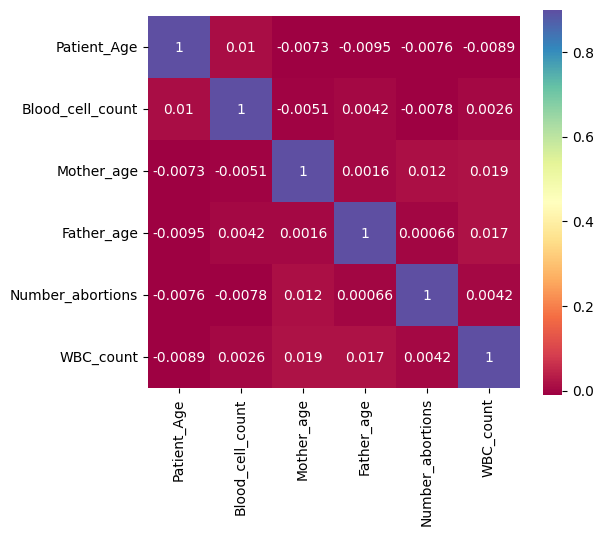

In [26]:
corrmat = df1[numeric_cols].corr()
plt.subplots(figsize=(6,5))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'Spectral', annot = True)

Text(0.5, 1.0, 'Relationship between Genetic Disorder subclass and Patient Age')

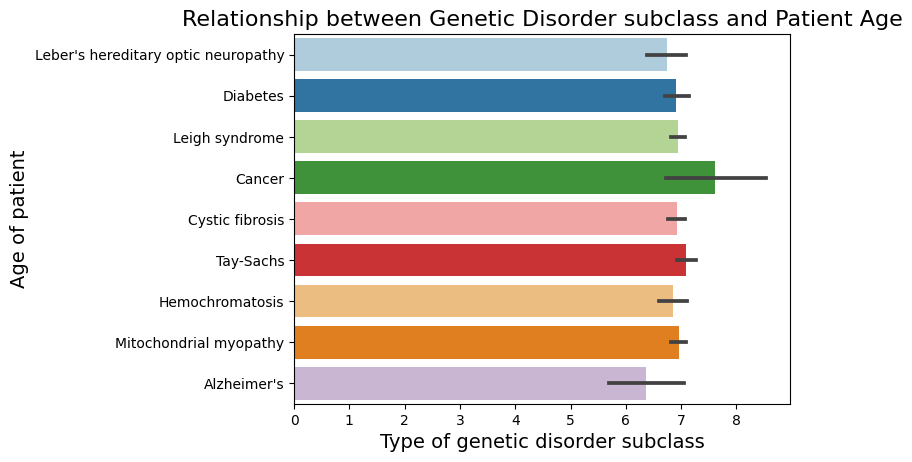

In [27]:
sns.barplot(data = df1, x = 'Patient_Age', y = 'Disorder_subclass',palette = 'Paired')
plt.xlabel("Type of genetic disorder subclass", size=14)
plt.ylabel("Age of patient", size=14)
plt.title('Relationship between Genetic Disorder subclass and Patient Age', size=16)

In [28]:
# Categorical columns
df1["Autopsy_birth_defect"].fillna(df1["Autopsy_birth_defect"].mode()[0], inplace=True)
df1["Birth_asphyxia"].fillna(df1["Birth_asphyxia"].mode()[0], inplace=True)
df1["Radiation_exposure"].fillna(df1["Radiation_exposure"].mode()[0], inplace=True)
df1["Substance_abuse"].fillna(df1["Substance_abuse"].mode()[0], inplace=True)
df1["Maternal_gene"].fillna(df1["Maternal_gene"].mode()[0], inplace=True)
df1["History_previous_pregnancies"].fillna(df1["History_previous_pregnancies"].mode()[0], inplace=True)
df1["Place_birth"].fillna(df1["Place_birth"].mode()[0], inplace=True)
df1["Assisted_conception"].fillna(df1["Assisted_conception"].mode()[0], inplace=True)
df1["Follow_up"].fillna(df1["Follow_up"].mode()[0], inplace=True)
df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)
df1["Respiratory_rate"].fillna(df1["Respiratory_rate"].mode()[0], inplace=True)
df1["Birth_defects"].fillna(df1["Birth_defects"].mode()[0], inplace=True)
df1["Folic_acid"].fillna(df1["Folic_acid"].mode()[0], inplace=True)
df1["Blood_test"].fillna(df1["Blood_test"].mode()[0], inplace=True)
df1["Maternal_illness"].fillna(df1["Maternal_illness"].mode()[0], inplace=True)
df1["Heart_rate"].fillna(df1["Heart_rate"].mode()[0], inplace=True)
df1["Father_inherit"].fillna(df1["Father_inherit"].mode()[0], inplace=True)


# Numerical columns
df1["Mother_age"].fillna(df1.groupby(["Disorder_subclass"])["Mother_age"].transform("mean"),inplace=True)
df1["Father_age"].fillna(df1.groupby(["Disorder_subclass"])["Father_age"].transform("mean"),inplace=True)
df1["WBC_count"].fillna(df1.groupby(["Disorder_subclass"])["WBC_count"].transform("mean"),inplace=True)
df1["Patient_Age"].fillna(df1.groupby(["Disorder_subclass"])["Patient_Age"].transform("mean"),inplace=True)
df1["Number_abortions"].fillna(df1.groupby(["Disorder_subclass"])["Number_abortions"].transform("mean"),inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18047 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   18047 non-null  float64
 1   Mother_inherit                18047 non-null  object 
 2   Father_inherit                18047 non-null  object 
 3   Maternal_gene                 18047 non-null  object 
 4   Paternal_gene                 18047 non-null  object 
 5   Blood_cell_count              18047 non-null  float64
 6   Mother_age                    18047 non-null  float64
 7   Father_age                    18047 non-null  float64
 8   Status                        18047 non-null  object 
 9   Respiratory_rate              18047 non-null  object 
 10  Heart_rate                    18047 non-null  object 
 11  Follow_up                     18047 non-null  object 
 12  Gender                        18047 non-null  object 
 13  Birth_

Use Label Encoder to change categorical values into numeric

In [30]:
le = LabelEncoder()
df2 = df1.copy()
df2[categoric_cols] = df2[categoric_cols].apply(le.fit_transform)
df2 = df2.astype("float32")

# Correlation analysis

<Axes: >

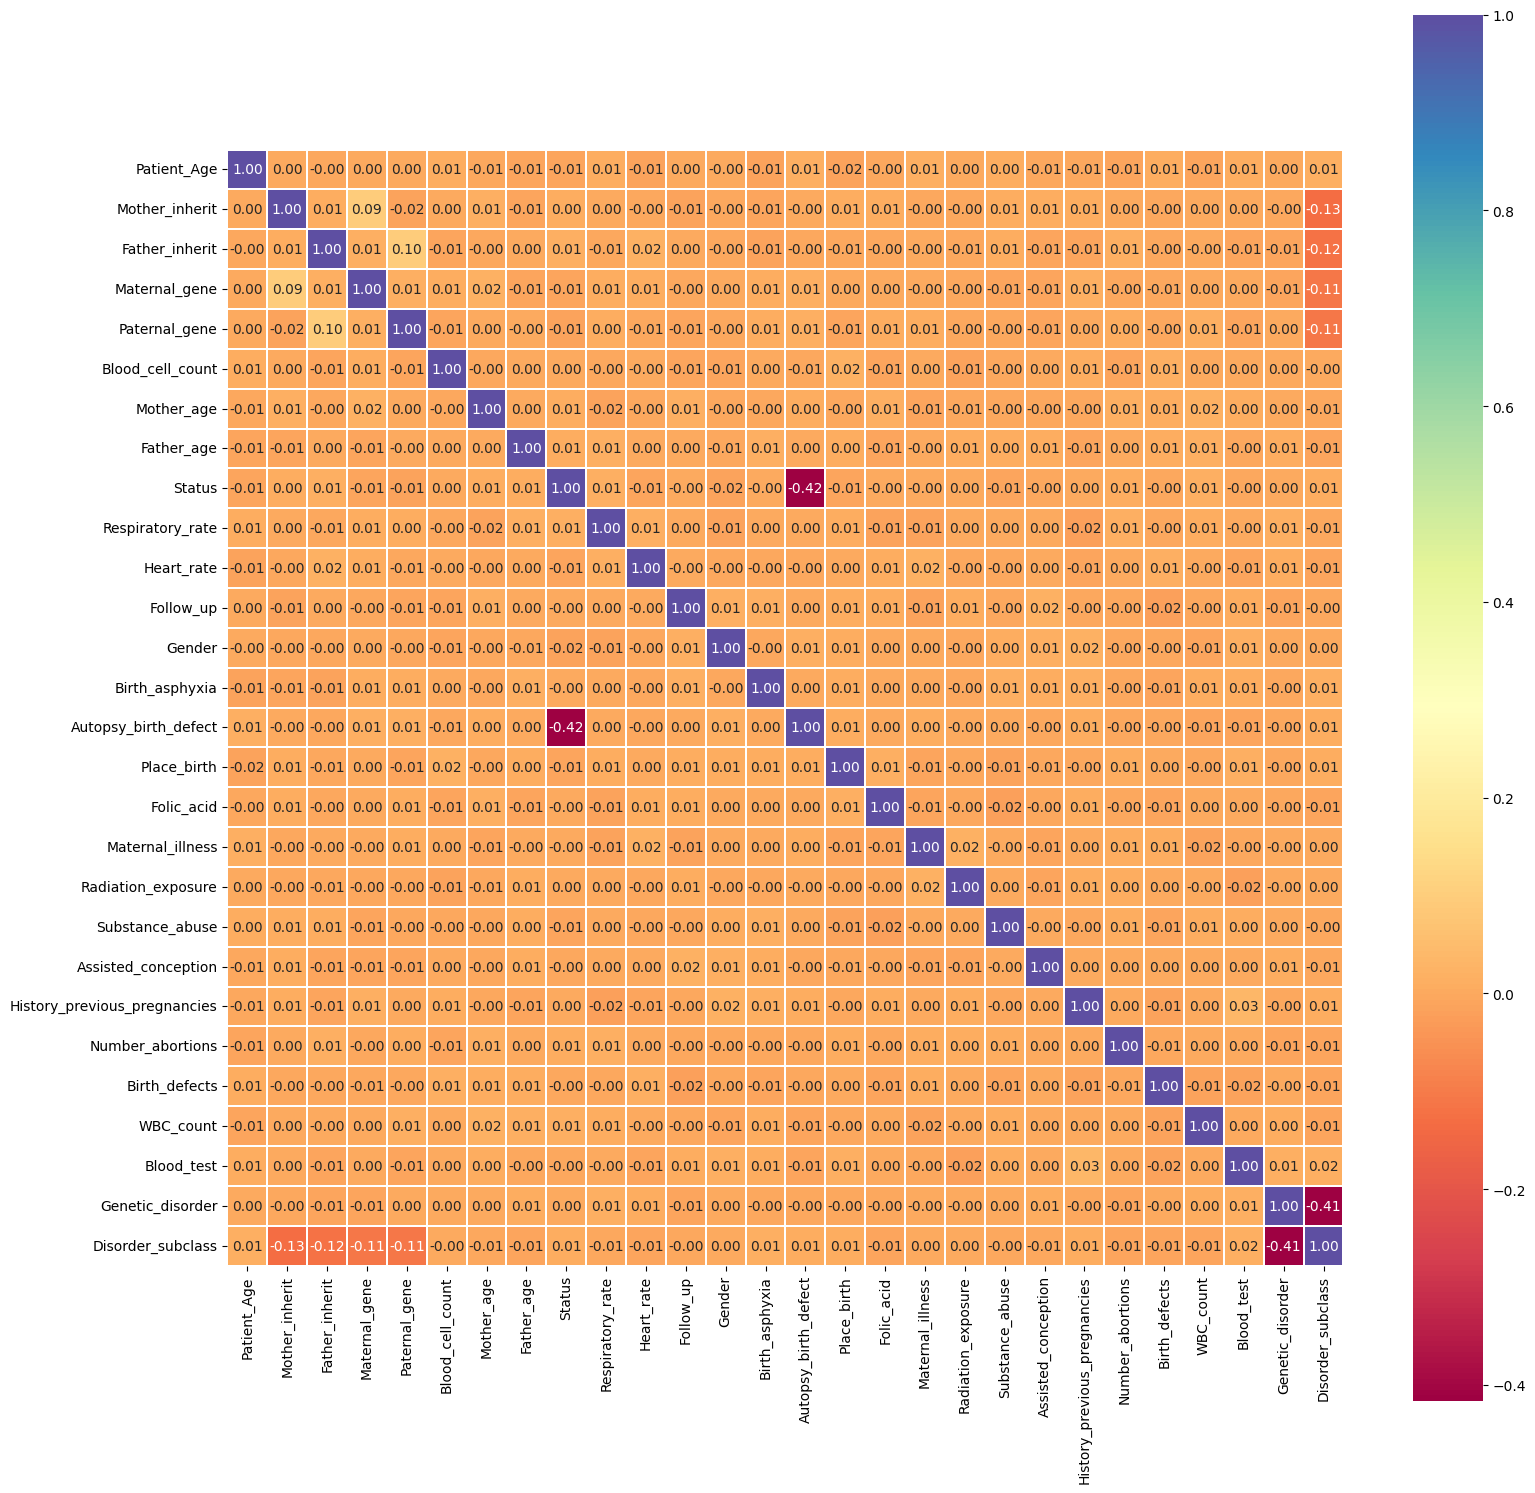

In [31]:
corrmat = df2.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, vmax=1, linewidths=0.1, square=True, cmap = 'Spectral', annot = True, fmt='.2f')

In [32]:
# Autopsy birth defect is negatively correlated with Status, since all patients with autopsy are deceased.
# For this reason, we can drop one of those columns.
df3 = df2.drop(["Autopsy_birth_defect"], axis=1)

# Univariate analysis

In [33]:
df3.describe()

Patient_Age  Mother_inherit  Father_inherit  Maternal_gene   
count  18047.000000    18047.000000    18047.000000   18047.000000  \
mean       6.948785        0.595279        0.390868       0.602538   
std        4.185820        0.490852        0.487958       0.489387   
min        0.000000        0.000000        0.000000       0.000000   
25%        3.000000        0.000000        0.000000       0.000000   
50%        7.000000        1.000000        0.000000       1.000000   
75%       10.000000        1.000000        1.000000       1.000000   
max       14.000000        1.000000        1.000000       1.000000   

       Paternal_gene  Blood_cell_count    Mother_age    Father_age   
count   18047.000000      18047.000000  18047.000000  18047.000000  \
mean        0.432648          4.899198     34.576065     41.971115   
std         0.495457          0.199061      8.524187     11.354011   
min         0.000000          4.146230     18.000000     20.000000   
25%         0.000000          4.764199     29.000000     34.000000   
50%         0.000000          4.900307     34.559017     42.000000   
75%         1.000000          5.033653     40.000000     50.000000   
max         1.000000          5.609829     51.000000     64.000000   

             Status  Respiratory_rate  ...  Radiation_exposure   
count  18047.000000      18047.000000  ...        18047.000000  \
mean       0.497922          0.454148  ...            0.228847   
std        0.500010          0.497907  ...            0.420102   
min        0.000000          0.000000  ...            0.000000   
25%        0.000000          0.000000  ...            0.000000   
50%        0.000000          0.000000  ...            0.000000   
75%        1.000000          1.000000  ...            0.000000   
max        1.000000          1.000000  ...            1.000000   

       Substance_abuse  Assisted_conception  History_previous_pregnancies   
count     18047.000000         18047.000000                  18047.000000  \
mean          0.228570             0.546573                      0.548512   
std           0.419923             0.497840                      0.497655   
min           0.000000             0.000000                      0.000000   
25%           0.000000             0.000000                      0.000000   
50%           0.000000             1.000000                      1.000000   
75%           0.000000             1.000000                      1.000000   
max           1.000000             1.000000                      1.000000   

       Number_abortions  Birth_defects     WBC_count    Blood_test   
count      18047.000000   18047.000000  18047.000000  18047.000000  \
mean           1.999276       0.456586      7.475657      1.648695   
std            1.347775       0.498125      2.530353      1.148575   
min            0.000000       0.000000      3.000000      0.000000   
25%            1.000000       0.000000      5.628244      1.000000   
50%            2.000000       0.000000      7.473799      2.000000   
75%            3.000000       1.000000      9.286786      3.000000   
max            4.000000       1.000000     12.000000      3.000000   

       Genetic_disorder  Disorder_subclass  
count      18047.000000       18047.000000  
mean           0.871890           5.293401  
std            0.937886           2.143880  
min            0.000000           0.000000  
25%            0.000000           3.000000  
50%            0.000000           6.000000  
75%            2.000000           7.000000  
max            2.000000           8.000000  

[8 rows x 27 columns]

In [34]:
print("\n----------- Calculate Mean -----------\n")
print(df3.mean())
 
print("\n----------- Calculate Median -----------\n")
print(df3.median())
 
print("\n----------- Calculate Mode -----------\n")
print(df3.mode())

print("\n----------- Calculate Standard Deviation -----------\n")
print(df3.std())


----------- Calculate Mean -----------

Patient_Age                      6.948785
Mother_inherit                   0.595279
Father_inherit                   0.390868
Maternal_gene                    0.602538
Paternal_gene                    0.432648
Blood_cell_count                 4.899198
Mother_age                      34.576065
Father_age                      41.971115
Status                           0.497922
Respiratory_rate                 0.454148
Heart_rate                       0.450103
Follow_up                        0.548401
Gender                           1.087715
Birth_asphyxia                   0.777525
Place_birth                      0.549343
Folic_acid                       0.548568
Maternal_illness                 0.454535
Radiation_exposure               0.228847
Substance_abuse                  0.228570
Assisted_conception              0.546573
History_previous_pregnancies     0.548512
Number_abortions                 1.999276
Birth_defects                    0.

Mother_age and Father_age have values in a higher range than other columns.

It can be useful to have all columns in the same range and so a logaritmic transformation can be applied. We can implemented if needed after trying machine learning modeling.

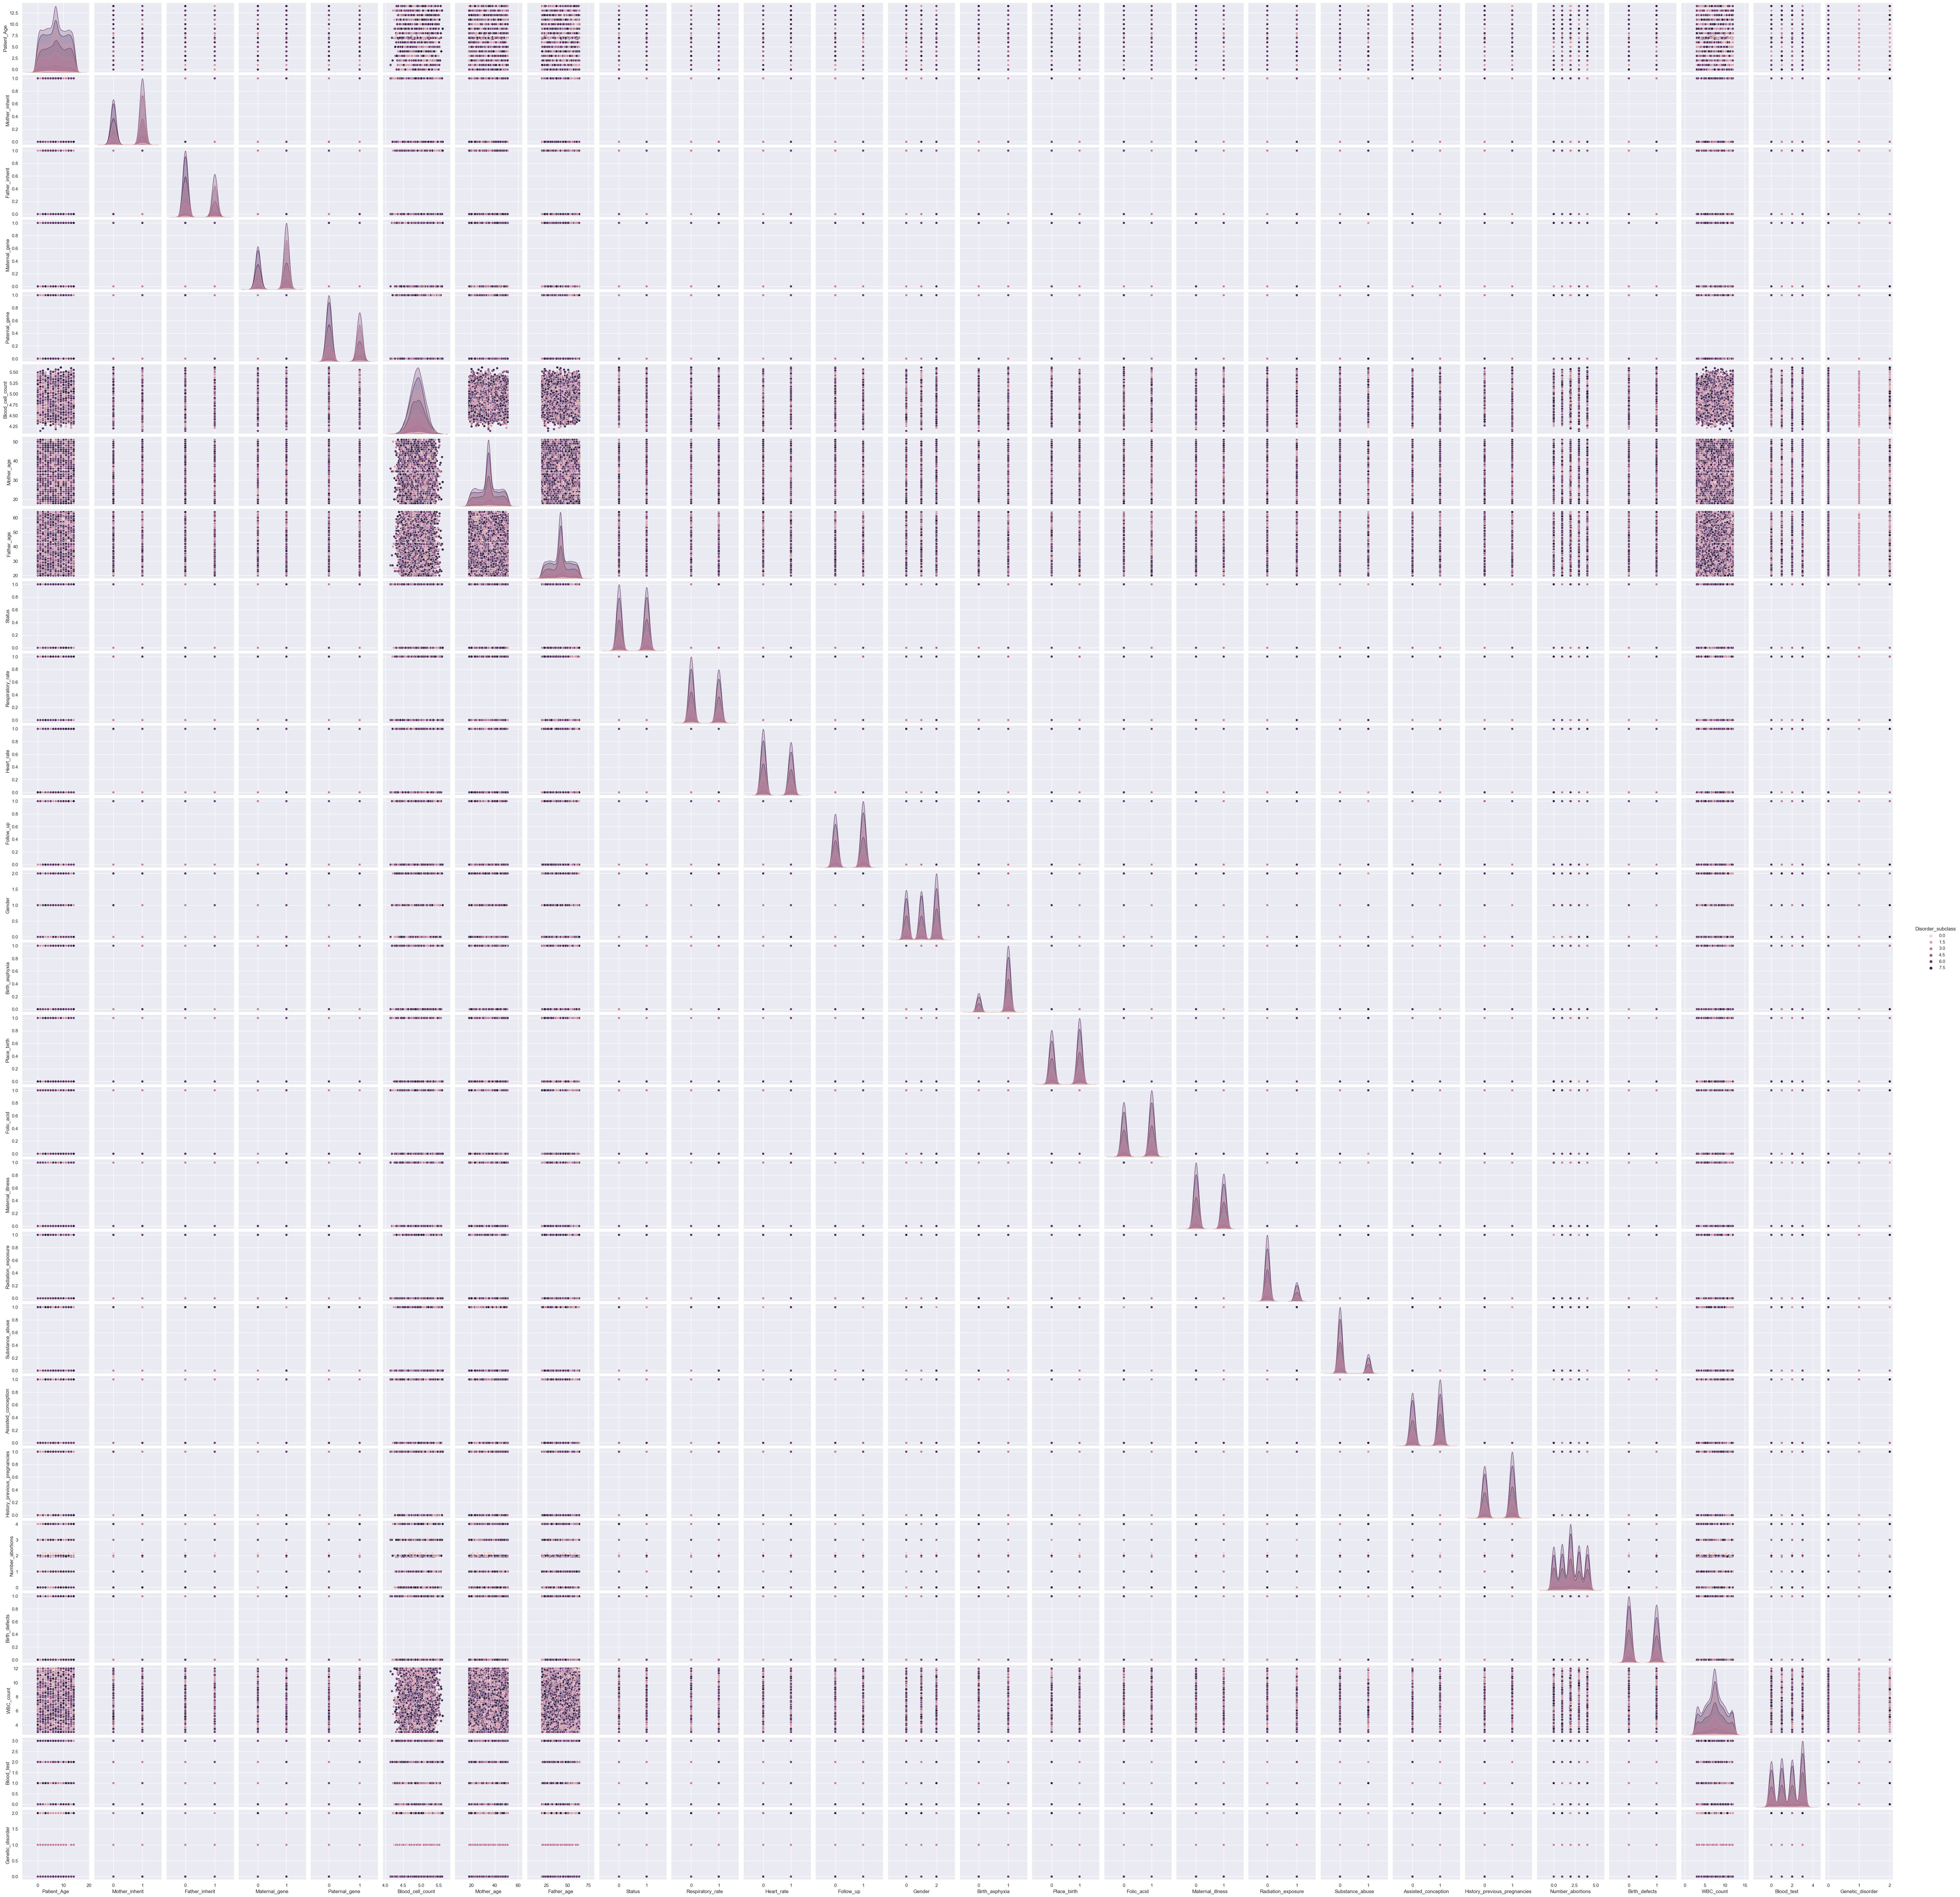

In [169]:
sns.pairplot(df3, hue="Disorder_subclass");

# Bivariate analysis

In [42]:
df3.columns

Index(['Patient_Age', 'Mother_inherit', 'Father_inherit', 'Maternal_gene',
       'Paternal_gene', 'Blood_cell_count', 'Mother_age', 'Father_age',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Place_birth', 'Folic_acid', 'Maternal_illness',
       'Radiation_exposure', 'Substance_abuse', 'Assisted_conception',
       'History_previous_pregnancies', 'Number_abortions', 'Birth_defects',
       'WBC_count', 'Blood_test', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

In [49]:
# Check if according to maternal and paternal associated inheritance there is a difference in the distribution of rows
df3.groupby(["Mother_inherit","Father_inherit"])["Patient_Age"].mean()

Mother_inherit  Father_inherit
0.0             0.0               6.959708
                1.0               6.907774
1.0             0.0               6.949244
                1.0               6.963746
Name: Patient_Age, dtype: float32

In [48]:
# Check if according to maternal and paternal associated genes there is a difference in the distribution of rows
df3.groupby(["Maternal_gene","Paternal_gene"])["Patient_Age"].mean()

Maternal_gene  Paternal_gene
0.0            0.0              6.965698
               1.0              6.924726
1.0            0.0              6.925710
               1.0              6.979152
Name: Patient_Age, dtype: float32

In [53]:
df3.groupby("Genetic_disorder")["Patient_Age"].mean()

Genetic_disorder
0.0    6.937565
1.0    6.903090
2.0    6.976126
Name: Patient_Age, dtype: float32

In [52]:
df3.groupby("Disorder_subclass")["Patient_Age"].mean()

Disorder_subclass
0.0    6.358778
1.0    7.616279
2.0    6.925110
3.0    6.907623
4.0    6.856771
5.0    6.748644
6.0    6.946026
7.0    6.955514
8.0    7.096241
Name: Patient_Age, dtype: float32

In [64]:
df3[df3["Patient_Age"] >= df3["Patient_Age"].mean()]["Disorder_subclass"].value_counts()

Disorder_subclass
6.0    2318
7.0    2199
2.0    1554
8.0    1433
3.0     811
4.0     597
5.0     292
0.0      55
1.0      52
Name: count, dtype: int64

In [74]:
df3.columns

Index(['Patient_Age', 'Mother_inherit', 'Father_inherit', 'Maternal_gene',
       'Paternal_gene', 'Blood_cell_count', 'Mother_age', 'Father_age',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Place_birth', 'Folic_acid', 'Maternal_illness',
       'Radiation_exposure', 'Substance_abuse', 'Assisted_conception',
       'History_previous_pregnancies', 'Number_abortions', 'Birth_defects',
       'WBC_count', 'Blood_test', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

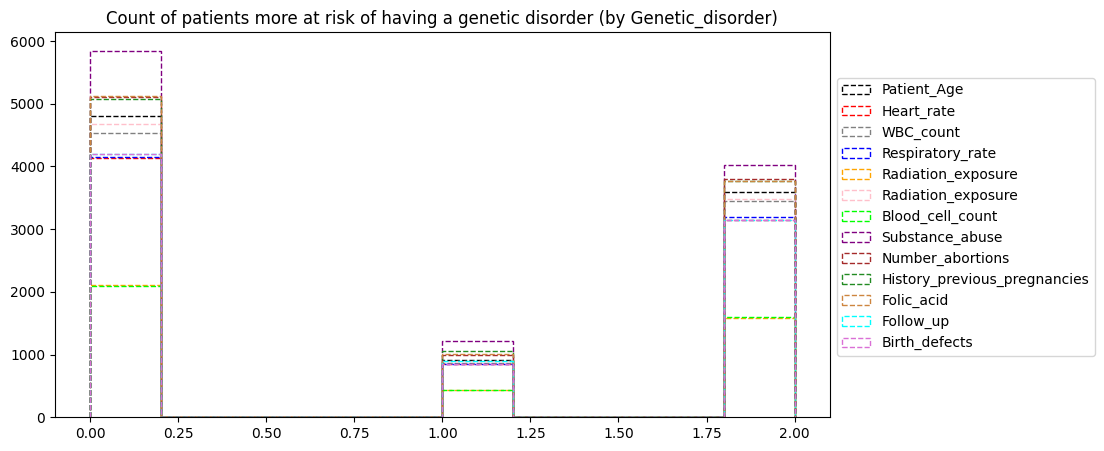

In [115]:
figure = plt.figure(figsize=(10,5))
plt.hist(df3[df3["Patient_Age"] >= df3["Patient_Age"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('black'), histtype='step')
plt.hist(df3[df3["Heart_rate"] >= df3["Heart_rate"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('red'), histtype='step')
plt.hist(df3[df3["WBC_count"] >= df3["WBC_count"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('grey'), histtype='step')
plt.hist(df3[df3["Respiratory_rate"] >= df3["Respiratory_rate"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('blue'), histtype='step')
plt.hist(df3[df3["Radiation_exposure"] >= df3["Radiation_exposure"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('orange'), histtype='step')
plt.hist(df3[df3["Blood_cell_count"] >= df3["Blood_cell_count"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('pink'), histtype='step')
plt.hist(df3[df3["Substance_abuse"] >= df3["Substance_abuse"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('lime'), histtype='step')
plt.hist(df3[df3["Number_abortions"] >= df3["Number_abortions"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('purple'), histtype='step')
plt.hist(df3[df3["History_previous_pregnancies"] >= df3["History_previous_pregnancies"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('brown'), histtype='step')
plt.hist(df3[df3["Folic_acid"] >= df3["Folic_acid"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('forestgreen'), histtype='step')
plt.hist(df3[df3["Follow_up"] >= df3["Follow_up"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('peru'), histtype='step')
plt.hist(df3[df3["Birth_defects"] >= df3["Birth_defects"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('cyan'), histtype='step')
plt.hist(df3[df3["Maternal_illness"] >= df3["Maternal_illness"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('orchid'), histtype='step')

labels = ['Patient_Age', 'Heart_rate', 'WBC_count', 'Respiratory_rate', 'Radiation_exposure', 'Radiation_exposure', 'Blood_cell_count',
          'Substance_abuse', 'Number_abortions', 'History_previous_pregnancies', 'Folic_acid', 'Follow_up', 'Birth_defects', 'Maternal_illness']
plt.legend(labels, bbox_to_anchor=(1, 0.9))
plt.title("Count of patients more at risk of having a genetic disorder (by Genetic_disorder)", size=12)
plt.show()

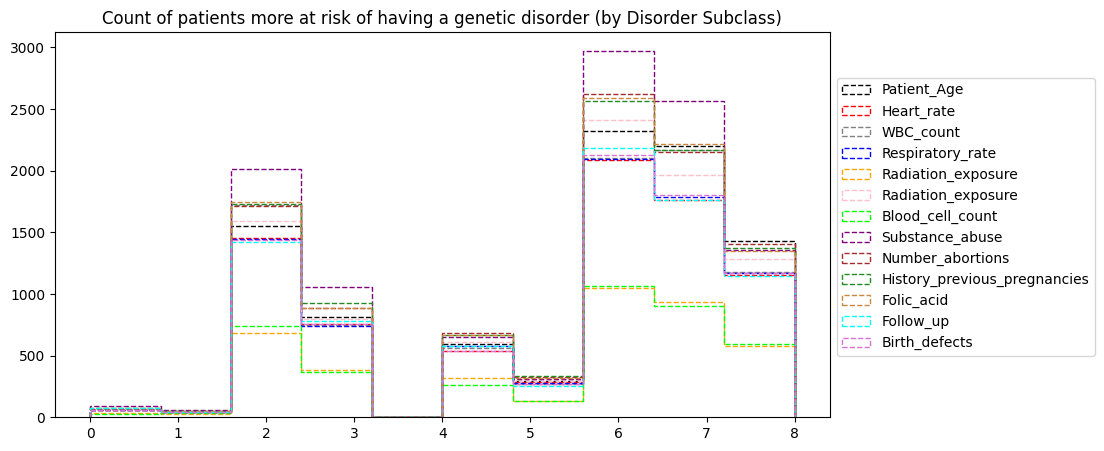

In [114]:
figure = plt.figure(figsize=(10,5))
plt.hist(df3[df3["Patient_Age"] >= df3["Patient_Age"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('black'), histtype='step')
plt.hist(df3[df3["Heart_rate"] >= df3["Heart_rate"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('red'), histtype='step')
plt.hist(df3[df3["WBC_count"] >= df3["WBC_count"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('grey'), histtype='step')
plt.hist(df3[df3["Respiratory_rate"] >= df3["Respiratory_rate"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('blue'), histtype='step')
plt.hist(df3[df3["Radiation_exposure"] >= df3["Radiation_exposure"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('orange'), histtype='step')
plt.hist(df3[df3["Blood_cell_count"] >= df3["Blood_cell_count"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('pink'), histtype='step')
plt.hist(df3[df3["Substance_abuse"] >= df3["Substance_abuse"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('lime'), histtype='step')
plt.hist(df3[df3["Number_abortions"] >= df3["Number_abortions"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('purple'), histtype='step')
plt.hist(df3[df3["History_previous_pregnancies"] >= df3["History_previous_pregnancies"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('brown'), histtype='step')
plt.hist(df3[df3["Folic_acid"] >= df3["Folic_acid"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('forestgreen'), histtype='step')
plt.hist(df3[df3["Follow_up"] >= df3["Follow_up"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('peru'), histtype='step')
plt.hist(df3[df3["Birth_defects"] >= df3["Birth_defects"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('cyan'), histtype='step')
plt.hist(df3[df3["Maternal_illness"] >= df3["Maternal_illness"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('orchid'), histtype='step')

labels = ['Patient_Age', 'Heart_rate', 'WBC_count', 'Respiratory_rate', 'Radiation_exposure', 'Radiation_exposure', 'Blood_cell_count',
          'Substance_abuse', 'Number_abortions', 'History_previous_pregnancies', 'Folic_acid', 'Follow_up', 'Birth_defects', 'Maternal_illness']
plt.legend(labels, bbox_to_anchor=(1, 0.9))
plt.title("Count of patients more at risk of having a genetic disorder (by Disorder Subclass)", size=12)
plt.show()

## Save dataset

In [41]:
df3.to_csv("../data/processed/df_eda.csv", index=False)